In [1]:
from Cleanup_Census import cleanup
import datetime
import statsmodels.api as sm
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.datasets import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.ensemble import *
%matplotlib inline
import pickle

In [2]:
navals = [" ","NA","N/A", "#N/A", "  "]
train = pd.read_csv("Census.csv", na_values = navals)
print(train.columns)

Index(['Ages', 'Appointee Status ', 'Wet Fingerprint Taken ',
       'PositionDescription ', 'Position Sensitivity Code ',
       'Selecting RCC ID ', 'Selecting ACO ID ', 'Chec Data ',
       'Scheduled By (User/CSR) ', 'Number of reschedules ',
       'Scheduled/Walk-in ', 'Scheduled Date ', 'Scheduled Time ', 'TimeZone ',
       'Scheduled at Site ID ', 'Scheduled at Site Name ',
       'Scheduled ACO Code (Dept ID) ', 'Scheduled RCC Code ',
       'Check in date ', 'Check in time ', 'ID proof completed date ',
       'ID proof completed time ', 'Photo Required ', 'Photo Taken ',
       'Photo taken date time ', 'Photo Taken Date ', 'Photo Taken Time ',
       'Photo Retrieved Date ', 'Photo Retrieved Time ',
       'Photo Received Date ', 'Photo Received Time ', 'Photo Abandoned ',
       'Photo Abandon Reason ', 'Photo Abandon Date ', 'Photo Abandon Time ',
       'BC 1759 Required ', 'Title 13 Required ', 'Fair Credit Required ',
       'OF 306 Required ', 'Work Authorization For

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (32,33,34,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train = cleanup(train)

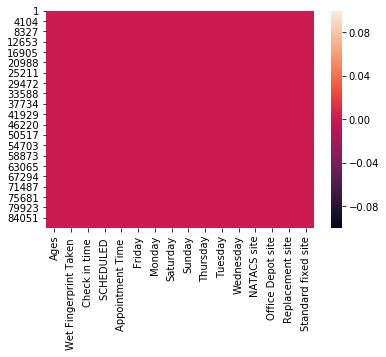

In [4]:
sns.heatmap(train.isnull())

In [5]:
x_train, x_test, y_train, y_test = train_test_split(train.drop("Appointment Time ", axis=1), train["Appointment Time "], test_size=0.3, random_state=50)

In [6]:
X = sm.add_constant(x_train)
est = sm.OLS(y_train, X)
print(est.fit().summary())

                            OLS Regression Results                            
Dep. Variable:      Appointment Time    R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     417.3
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        10:42:08   Log-Likelihood:            -3.1961e+05
No. Observations:               31953   AIC:                         6.392e+05
Df Residuals:                   31938   BIC:                         6.394e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5181

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
RFRm = RandomForestRegressor(n_estimators=50, random_state=96)
RFRm.fit(x_train, y_train)
predictions = RFRm.predict(x_test)
pickle.dump(RFRm, open("RFR_Model", "wb"))

In [8]:
model = pickle.load(open("RFR_Model", "rb"))
result = model.score(x_test, y_test)
print(result)

0.19035126531355917


In [9]:
train.transpose()[58923]

Ages                       52.0
Wet Fingerprint Taken       0.0
Check in time             273.0
SCHEDULED                   1.0
Appointment Time          272.0
Friday                      0.0
Monday                      0.0
Saturday                    0.0
Sunday                      0.0
Thursday                    0.0
Tuesday                     0.0
Wednesday                   1.0
NATACS site                 1.0
Office Depot site           0.0
Replacement site            0.0
Standard fixed site         0.0
Name: 58923, dtype: float64

In [10]:
test_frame = pd.DataFrame(x_train[1,:])
test_frame[0] = 52, 0, 237, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0
print(test_frame)
prediction = RFRm.predict([test_frame[0]])
print("Time: " + str(prediction))

      0
0    52
1     0
2   237
3     1
4     0
5     1
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
Time: [449.18]


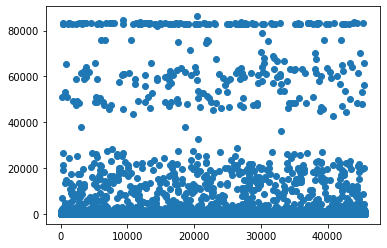

In [11]:
plt.scatter(y="Appointment Time ", x=range(45648), data=train)

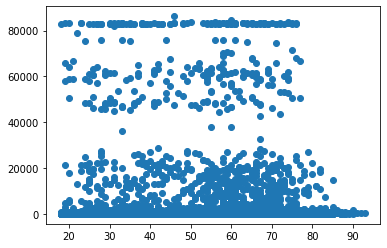

In [12]:
plt.scatter(y="Appointment Time ", x="Ages", data=train)

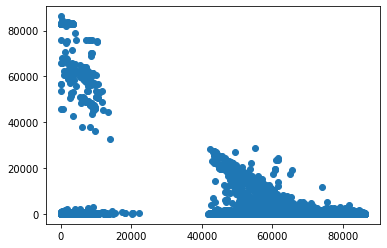

In [13]:
plt.scatter(y="Appointment Time ", x="Check in time ", data=train)

(array([4.5026e+04, 1.7800e+02, 1.2300e+02, 1.7000e+01, 4.0000e+00,
        5.6000e+01, 4.7000e+01, 5.8000e+01, 1.4000e+01, 1.2500e+02]),
 array([1.00000e+00, 8.62660e+03, 1.72522e+04, 2.58778e+04, 3.45034e+04,
        4.31290e+04, 5.17546e+04, 6.03802e+04, 6.90058e+04, 7.76314e+04,
        8.62570e+04]),
 <a list of 10 Patch objects>)

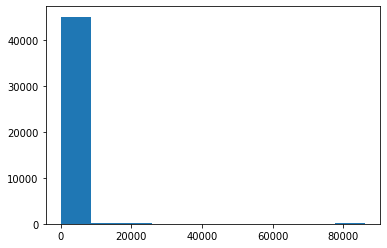

In [14]:
plt.hist(x="Appointment Time ", data=train, bins=10)

In [15]:
pickle.dump(RFRm, open("RFRm.pkl", "wb"))